In [1]:
#https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
!pip install virtualenv

In [2]:
!virtualenv myenv

created virtual environment CPython3.9.13.final.0-64 in 269ms
  creator CPython3Posix(dest=/Users/zaarr/Desktop/POSTDOC HBKU/CODE/4. Image and Video/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/zaarr/Library/Application Support/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [3]:
!source myenv/bin/activate

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


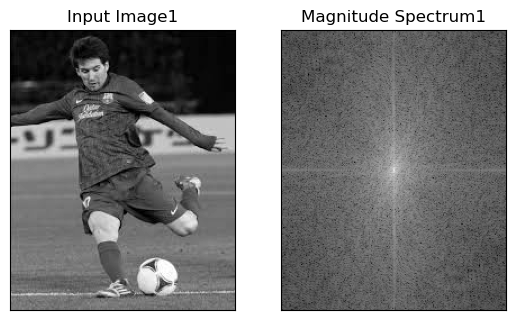

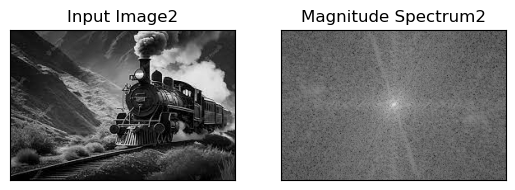

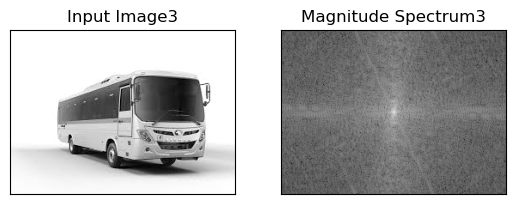

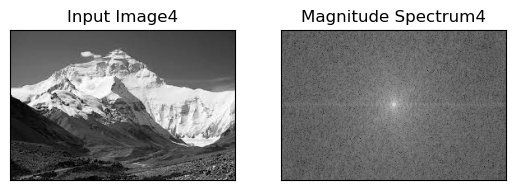

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum1'), plt.xticks([]), plt.yticks([])
plt.show()

img1 = cv2.imread('train.jpg',0)
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(fshift1))

plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image2'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum2'), plt.xticks([]), plt.yticks([])
plt.show()

img2 = cv2.imread('bus.jpg',0)
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))

plt.subplot(121),plt.imshow(img2, cmap = 'gray')
plt.title('Input Image3'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum3'), plt.xticks([]), plt.yticks([])
plt.show()

img3 = cv2.imread('mountain.jpg',0)
f3 = np.fft.fft2(img3)
fshift3 = np.fft.fftshift(f3)
magnitude_spectrum3 = 20*np.log(np.abs(fshift3))

plt.subplot(121),plt.imshow(img3, cmap = 'gray')
plt.title('Input Image4'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum3, cmap = 'gray')
plt.title('Magnitude Spectrum4'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

2023-06-18 13:45:22.351512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


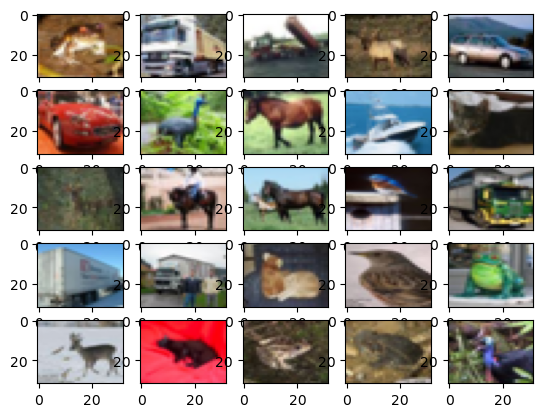

In [6]:
import matplotlib.pyplot as plt

# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_7249/411320758.py:22: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


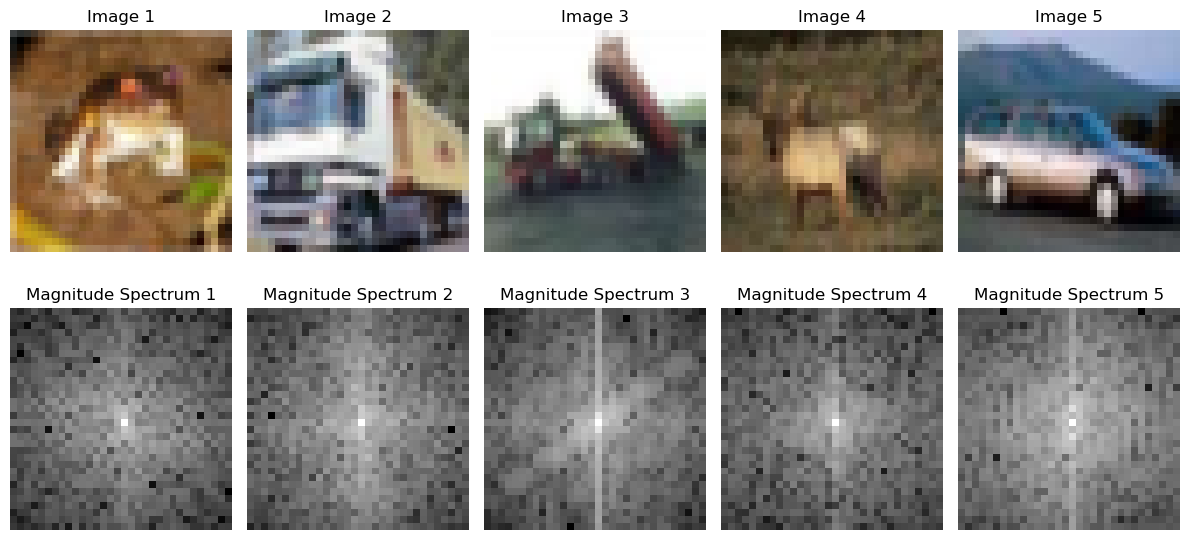

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming you have an array of images named 'image_array'

# Create an empty list to store the magnitude spectra of each image
magnitude_spectra = []

# Loop over each image in the array
for img in x_train:
    # Convert the image to grayscale and normalize the depth
    gray_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Perform Fourier Transform
    f = np.fft.fft2(gray_img)

    # Shift the zero-frequency component to the center
    fshift = np.fft.fftshift(f)

    # Calculate the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Append the magnitude spectrum to the list
    magnitude_spectra.append(magnitude_spectrum)

# Convert the list of magnitude spectra to a NumPy array
magnitude_spectra = np.array(magnitude_spectra)

num_images = 5
plt.figure(figsize=(12, 6))

for i in range(num_images):
    # Convert the image to grayscale
    gray_img = np.dot(x_train[i], [0.2989, 0.5870, 0.1140])

    # Perform Fourier Transform
    f = np.fft.fft2(gray_img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title('Image {}'.format(i + 1))
    plt.axis('off')

    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum {}'.format(i + 1))
    plt.axis('off')

plt.tight_layout()
plt.show()

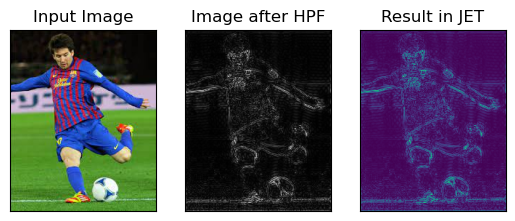

In [21]:
img = cv2.imread('messi.jpg')



# Convert the image to grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Fourier Transform
f = np.fft.fft2(gray_img)
fshift = np.fft.fftshift(f)

# Calculate the shape of the image
rows, cols = gray_img.shape

# Calculate the center coordinates
crow, ccol = rows // 2, cols // 2

# Apply the High Pass Filter
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# Perform inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the images
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()


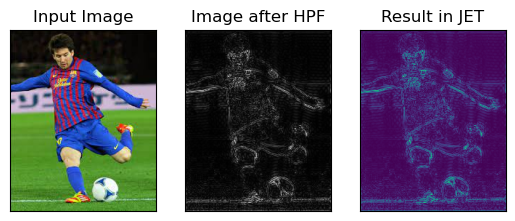

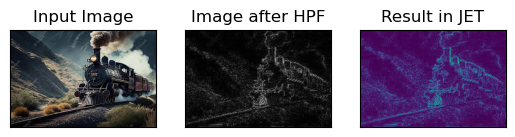

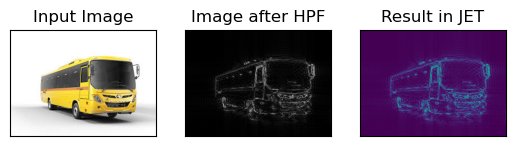

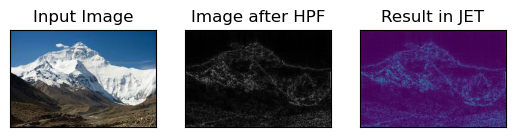

In [22]:
image_paths = ['messi.jpg', 'train.jpg', 'bus.jpg', 'mountain.jpg']

# Process each image in the list
for img_path in image_paths:
    # Read the image
    img = cv2.imread(img_path)
    
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Perform Fourier Transform
    f = np.fft.fft2(gray_img)
    fshift = np.fft.fftshift(f)
    
    # Calculate the shape of the image
    rows, cols = gray_img.shape
    
    # Calculate the center coordinates
    crow, ccol = rows // 2, cols // 2
    
    # Apply the High Pass Filter
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
    
    # Perform inverse Fourier Transform
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    # Display the images
    plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img_back, cmap='gray')
    plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img_back)
    plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
    
    plt.show()


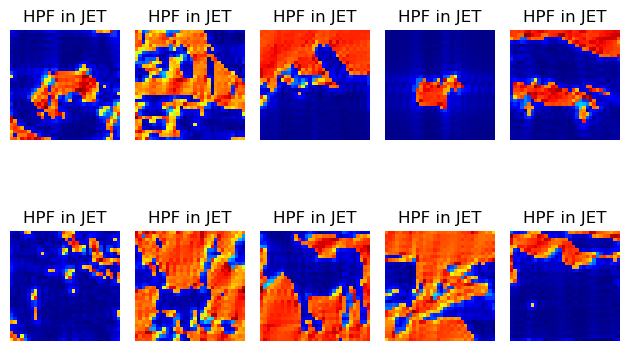

In [60]:
# Create an empty list to store the results
results = []

# Process 10 images from x_train
for i in range(10):
    img = x_train[i]

    # Convert the image to 8-bit unsigned integer
    img = cv2.convertScaleAbs(img)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform Fourier Transform
    f = np.fft.fft2(gray_img)
    fshift = np.fft.fftshift(f)

    # Apply the High Pass Filter
    rows, cols = gray_img.shape
    crow, ccol = rows // 2, cols // 2
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

    # Perform inverse Fourier Transform
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Store the resulting image in the list
    results.append(img_back)

# Display the images
for i in range(10):
    img_back = results[i]

    plt.subplot(2, 5, i+1)
    plt.imshow(img_back, cmap='jet')
    plt.title('HPF in JET')
    plt.axis('off')

plt.tight_layout()
plt.show()


/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_7249/3569695349.py:28: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(f_shift))
/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_7249/3569695349.py:31: RuntimeWarning: invalid value encountered in cast
  jet_img = cv2.applyColorMap(magnitude_spectrum.astype(np.uint8), cv2.COLORMAP_JET)


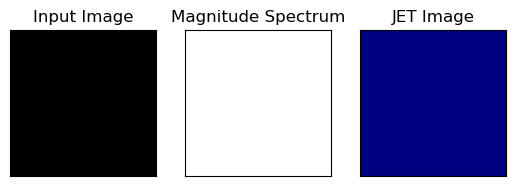

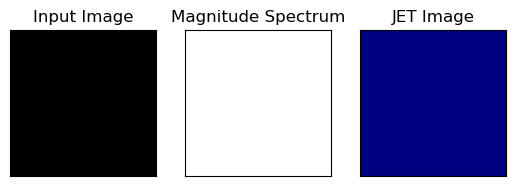

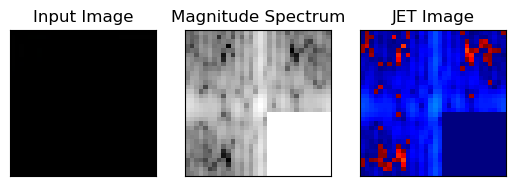

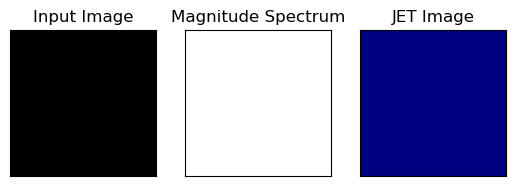

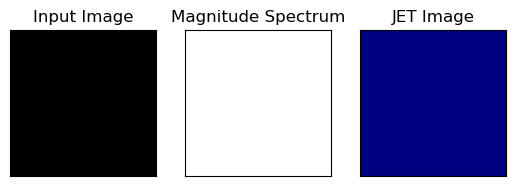

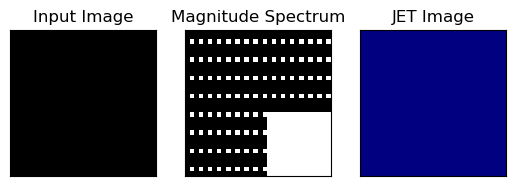

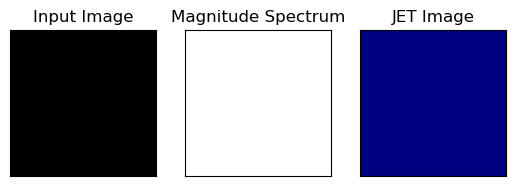

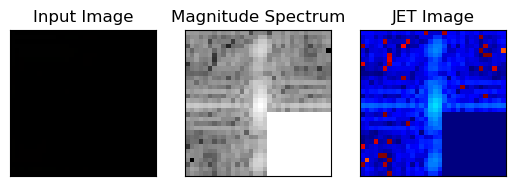

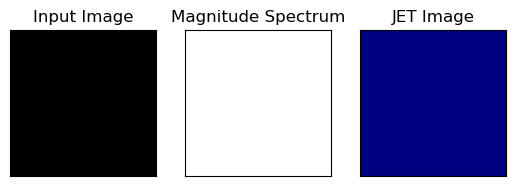

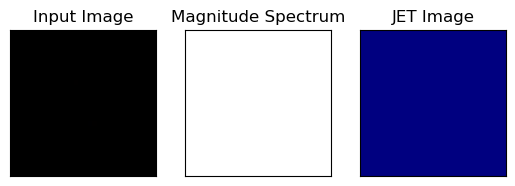

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Select 10 random images from x_train
indices = np.random.randint(0, len(x_train), size=10)
images = x_train[indices]

for i, img in enumerate(images):
    # Convert image to BGR format and uint8 data type
    img = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2BGR).astype(np.uint8)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform Fourier Transform
    f = np.fft.fft2(gray_img)

    # Apply High Pass Filter
    rows, cols = gray_img.shape
    crow, ccol = rows // 2, cols // 2
    f_shift = np.fft.fftshift(f)
    f_shift[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = np.fft.ifft2(f_ishift)

    # Compute magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    # Convert the image to JET colormap
    jet_img = cv2.applyColorMap(magnitude_spectrum.astype(np.uint8), cv2.COLORMAP_JET)

    # Display the images
    plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(cv2.cvtColor(jet_img, cv2.COLOR_BGR2RGB))
    plt.title('JET Image'), plt.xticks([]), plt.yticks([])

    plt.show()


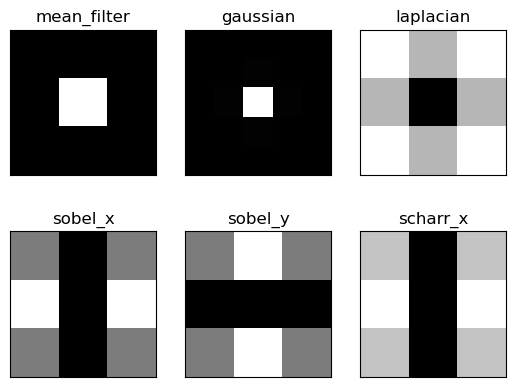

In [62]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()